In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data 불러오기

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 데이터 시각화

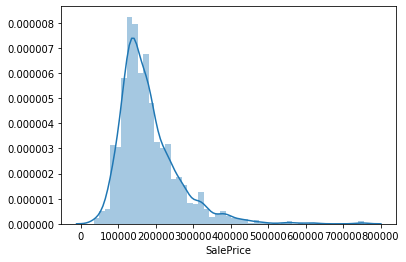

In [8]:
sns.distplot(train['SalePrice'])

## corr

In [10]:
train_corr = train.corr()

In [23]:
train_corr_desc = train_corr['SalePrice'].sort_values(ascending=False)

In [26]:
train_corr_desc03 = train_corr_desc[train_corr_desc>0.3]

In [29]:
train_corr_desc03

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

In [27]:
train_corr_index = train_corr_desc03.index

In [28]:
train_corr_index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')

In [32]:
train_corr_index = train_corr_index[1:]

In [33]:
train_corr_index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

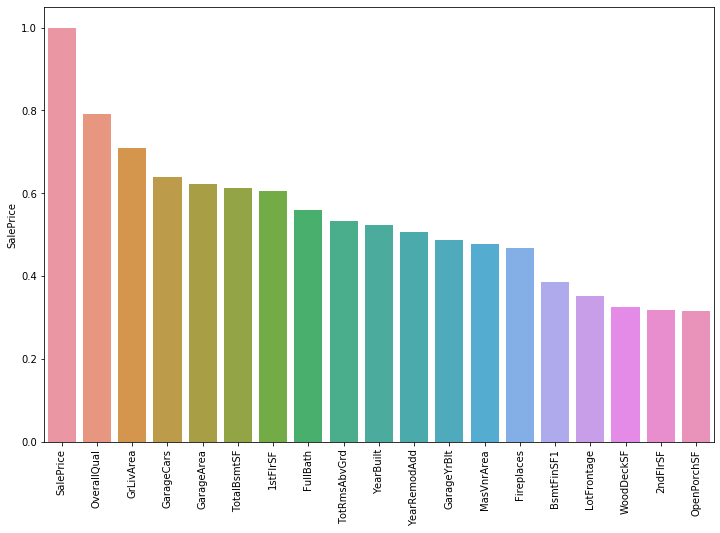

In [31]:
f, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=train_corr_desc03.index, y=train_corr_desc03)
plt.xticks(rotation='90')

In [34]:
train_corr_index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')

## SalePrice 및 다른 feature의 관계

In [35]:
train[train_corr_index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   FullBath      1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   YearBuilt     1460 non-null   int64  
 9   YearRemodAdd  1460 non-null   int64  
 10  GarageYrBlt   1379 non-null   float64
 11  MasVnrArea    1452 non-null   float64
 12  Fireplaces    1460 non-null   int64  
 13  BsmtFinSF1    1460 non-null   int64  
 14  LotFrontage   1201 non-null   float64
 15  WoodDeckSF    1460 non-null   int64  
 16  2ndFlrSF      1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
dtypes: float64(3), int64(15)
mem

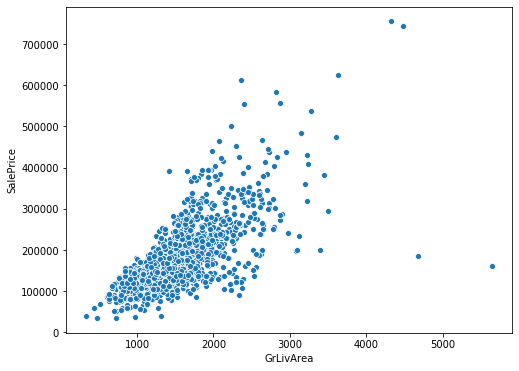

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])

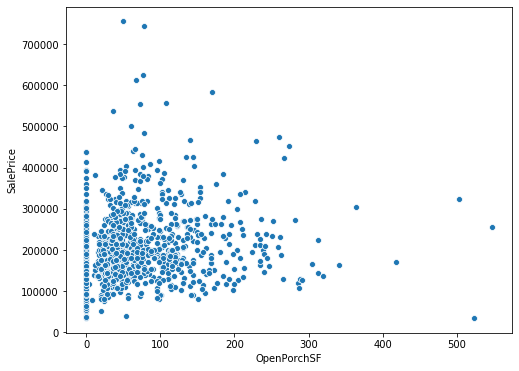

In [59]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train['OpenPorchSF'], y=train['SalePrice'])

# 데이터 전처리

## 이상치 확인 및 처리

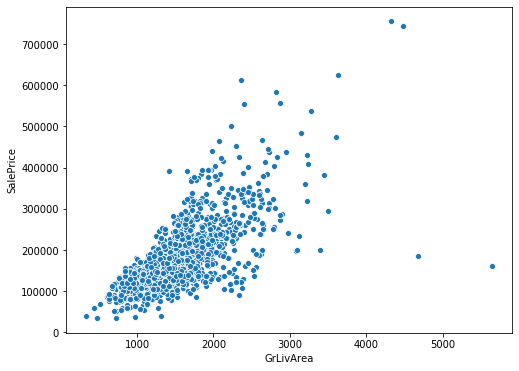

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])

In [41]:
train = train.drop(train[(train['GrLivArea']>4000) &\
                         (train['SalePrice']<300000)].index)


In [42]:
train.shape

(1458, 81)

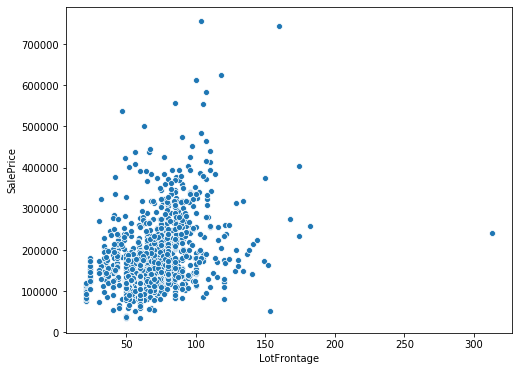

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train['LotFrontage'], y=train['SalePrice'])

In [55]:
train = train.drop(train[(train['LotFrontage']>250) &\
                         (train['SalePrice']<300000)].index)
train.shape

(1457, 81)

## train test concat 

In [60]:
train_Id = train['Id']
test_Id = test['Id']

In [61]:
n_train = train.shape[0]
n_test = test.shape[0]
print(n_train)
n_test

1457


1459

In [62]:
y_train = train.SalePrice.values

In [63]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2916, 80)

In [64]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# 결측치 처리

In [77]:
all_data_na = all_data.isnull().sum().sort_values(ascending=False) / len(all_data_na)

In [78]:
all_data_na = all_data_na[all_data_na>0]

In [79]:
len(all_data_na)

34

Text(0, 0.5, 'percentage')

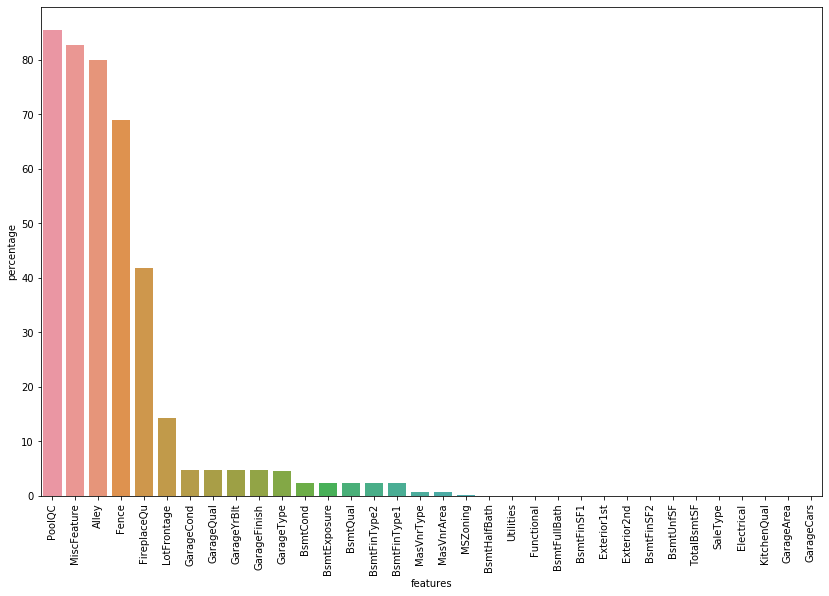

In [80]:
f, ax = plt.subplots(figsize=(14,9))
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xticks(rotation='90')
plt.xlabel('features')
plt.ylabel('percentage')

In [81]:
for i in all_data_na.index[:5]:
    del all_data[i]

In [85]:
all_data_na2 = all_data_na[5:]

In [86]:
all_data_na2

LotFrontage     14.294118
GarageCond       4.676471
GarageQual       4.676471
GarageYrBlt      4.676471
GarageFinish     4.676471
GarageType       4.617647
BsmtCond         2.411765
BsmtExposure     2.411765
BsmtQual         2.382353
BsmtFinType2     2.352941
BsmtFinType1     2.323529
MasVnrType       0.705882
MasVnrArea       0.676471
MSZoning         0.117647
BsmtHalfBath     0.058824
Utilities        0.058824
Functional       0.058824
BsmtFullBath     0.058824
BsmtFinSF1       0.029412
Exterior1st      0.029412
Exterior2nd      0.029412
BsmtFinSF2       0.029412
BsmtUnfSF        0.029412
TotalBsmtSF      0.029412
SaleType         0.029412
Electrical       0.029412
KitchenQual      0.029412
GarageArea       0.029412
GarageCars       0.029412
dtype: float64

In [87]:
len(all_data_na2)

29

In [89]:
all_data[all_data_na2.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   2430 non-null   float64
 1   GarageCond    2757 non-null   object 
 2   GarageQual    2757 non-null   object 
 3   GarageYrBlt   2757 non-null   float64
 4   GarageFinish  2757 non-null   object 
 5   GarageType    2759 non-null   object 
 6   BsmtCond      2834 non-null   object 
 7   BsmtExposure  2834 non-null   object 
 8   BsmtQual      2835 non-null   object 
 9   BsmtFinType2  2836 non-null   object 
 10  BsmtFinType1  2837 non-null   object 
 11  MasVnrType    2892 non-null   object 
 12  MasVnrArea    2893 non-null   float64
 13  MSZoning      2912 non-null   object 
 14  BsmtHalfBath  2914 non-null   float64
 15  Utilities     2914 non-null   object 
 16  Functional    2914 non-null   object 
 17  BsmtFullBath  2914 non-null   float64
 18  BsmtFinSF1    2915 non-null 

In [101]:
for i in all_data_na2.index:
    if all_data[i].dtypes == 'float64':
        all_data[i] = all_data[i].fillna(0)
    else:
        all_data[i] = all_data[i].fillna('None')
    

In [103]:
all_data.isnull().sum().sort_values(ascending=False)

SaleCondition    0
YearBuilt        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Id               0
Length: 75, dtype: int64

In [104]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2916 non-null   int64  
 1   MSSubClass     2916 non-null   int64  
 2   MSZoning       2916 non-null   object 
 3   LotFrontage    2916 non-null   float64
 4   LotArea        2916 non-null   int64  
 5   Street         2916 non-null   object 
 6   LotShape       2916 non-null   object 
 7   LandContour    2916 non-null   object 
 8   Utilities      2916 non-null   object 
 9   LotConfig      2916 non-null   object 
 10  LandSlope      2916 non-null   object 
 11  Neighborhood   2916 non-null   object 
 12  Condition1     2916 non-null   object 
 13  Condition2     2916 non-null   object 
 14  BldgType       2916 non-null   object 
 15  HouseStyle     2916 non-null   object 
 16  OverallQual    2916 non-null   int64  
 17  OverallCond    2916 non-null   int64  
 18  YearBuil

# Feature 만들기

In [105]:
train_feature = train_corr_index

In [106]:
label_feature = 'SalePrice'

# Feature engineering

In [108]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [109]:
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for i in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[i].values))
    all_data[i] = lbl.transform(list(all_data[i].values))
    
print("Shape of all data: {}".format(all_data.shape))

Shape of all data: (2916, 75)


In [110]:
all_data_train_feature = all_data[train_feature]

In [115]:
all_data_train_feature = pd.get_dummies(all_data_train_feature)
all_data_train_feature.shape

(2916, 18)

In [116]:
all_data_train_feature.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,7,1710,2.0,548.0,856.0,856,2,8,2003,2003,2003.0,196.0,0,706.0,65.0,0,854,61
1,6,1262,2.0,460.0,1262.0,1262,2,6,1976,1976,1976.0,0.0,1,978.0,80.0,298,0,0
2,7,1786,2.0,608.0,920.0,920,2,6,2001,2002,2001.0,162.0,1,486.0,68.0,0,866,42
3,7,1717,3.0,642.0,756.0,961,1,7,1915,1970,1998.0,0.0,1,216.0,60.0,0,756,35
4,8,2198,3.0,836.0,1145.0,1145,2,9,2000,2000,2000.0,350.0,1,655.0,84.0,192,1053,84


In [117]:
train = all_data_train_feature[:n_train]
test = all_data_train_feature[n_train:]

In [118]:
train.shape, test.shape

((1457, 18), (1459, 18))

In [161]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2916, 219)

In [162]:
train = all_data[:n_train]
test = all_data[n_train:]

In [163]:
train.shape, test.shape

((1457, 219), (1459, 219))

# dataset 만들기

In [164]:
X_train = train
y_train
X_test = test

# Modeling

## RandomForest

In [165]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
model = RandomForestRegressor(random_state=42)

In [167]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [168]:
y_predict = model.predict(X_test)
y_predict

array([128048.66, 156214.  , 181541.97, ..., 156392.74, 111135.  ,
       229837.75])

In [169]:
y_predict.shape

(1459,)

In [170]:
from sklearn.model_selection import cross_val_predict
y_predict1 = cross_val_predict(model, X_train, y_train,
                              cv=5, verbose=5, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


In [171]:
len(y_predict1)

1457

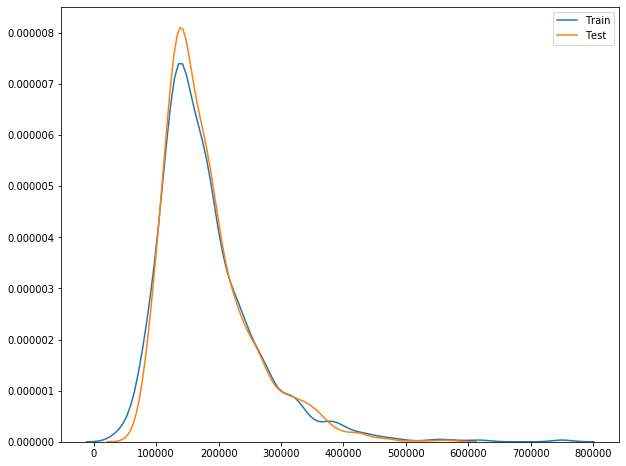

In [172]:
f, ax = plt.subplots(figsize=(10,8))
sns.distplot(y_train, hist=False, label='Train')
sns.distplot(y_predict1, hist=False, label='Test')

## 최적의 estimator 찾기

### RandomizedSearchCV

In [177]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [178]:
estimators = [DecisionTreeRegressor(random_state=42),
             GradientBoostingRegressor(random_state=42),
             RandomForestRegressor(random_state=42)]

In [179]:
RandomizedSearchCV?

In [180]:
param_distributions = {'max_depth': np.random.randint(3, 20, 200),
                      'max_features': np.random.uniform(0.3, 1.0, 200)}

In [181]:
results = []

for estimator in estimators:
    result = []
    
    regressor = RandomizedSearchCV(estimator,
                                  param_distributions=param_distributions,
                                  n_iter=200,
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=2,
                                  random_state=42)
    
    regressor.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    
    results.append(result)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.2min finished


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.2min finished


In [141]:
results

[['DecisionTreeRegressor',
  {'max_features': 0.5152032987197328, 'max_depth': 6},
  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                        max_features=0.5152032987197328, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
  0.7897338904951113,
  {'mean_fit_time': array([0.018082  , 0.01229305, 0.01028485, 0.00966053, 0.00976224,
          0.01426239, 0.00984697, 0.00899372, 0.00442805, 0.00995398,
          0.00403099, 0.01139617, 0.01515899, 0.00493932, 0.00999122,
          0.00990701, 0.01314826, 0.00597081, 0.01341343, 0.0070488 ,
          0.01034284, 0.0076014 , 0.01038904, 0.00473528, 0.01203575,
          0.01008859, 0.01391058, 0.01124463, 0.00659366, 0.00946589,
          0.0066185 , 0.01037436, 0

In [182]:
df_cv = pd.DataFrame(results, columns=['model', 'params', 'estimator', 'best_score', 'cv_results'])
df_cv

,model,params,estimator,best_score,cv_results
0,DecisionTreeRegressor,"{'max_features': 0.6123741248608356, 'max_dept...","DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0.789384,"{'mean_fit_time': [0.04023756980895996, 0.0183..."
1,GradientBoostingRegressor,"{'max_features': 0.3200742240685949, 'max_dept...","([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.921647,"{'mean_fit_time': [3.3845037460327148, 1.00454..."
2,RandomForestRegressor,"{'max_features': 0.3900923999254018, 'max_dept...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.897677,"{'mean_fit_time': [2.1479690074920654, 0.79453..."


In [183]:
best_estimator = df_cv.loc[1, 'estimator']

In [184]:
best_estimator

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=0.3200742240685949, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [185]:
pd.DataFrame(df_cv.loc[1, 'cv_results']).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.392138,0.055800,0.003751,0.000641,0.320074,3,"{'max_features': 0.3200742240685949, 'max_dept...",0.919805,0.923403,0.908998,0.927357,0.928672,0.921647,0.007049,1
81,0.921892,0.002417,0.003299,0.000075,0.691289,4,"{'max_features': 0.6912891191152131, 'max_dept...",0.918545,0.932798,0.907513,0.925858,0.921965,0.921336,0.008380,2
87,0.428605,0.011849,0.003555,0.000864,0.374366,3,"{'max_features': 0.37436594764449665, 'max_dep...",0.924434,0.927186,0.921968,0.916703,0.916173,0.921293,0.004297,3
144,0.477008,0.016790,0.003086,0.000057,0.372938,3,"{'max_features': 0.3729381036810393, 'max_dept...",0.924434,0.927186,0.921968,0.916703,0.916173,0.921293,0.004297,3
43,0.976870,0.034559,0.003551,0.000542,0.613397,4,"{'max_features': 0.6133972156313113, 'max_dept...",0.926547,0.928209,0.902741,0.922139,0.917368,0.919401,0.009141,5


# 최적의 estimator로 모델링 하기

In [186]:
best_estimator

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=0.3200742240685949, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [187]:
model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=0.7707327102842128, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [188]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=0.7707327102842128, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [189]:
y_predict = model.predict(X_test)

In [190]:
y_predict

array([120528.24000105, 165761.4275536 , 167761.04599276, ...,
       158340.55662633, 119861.75028872, 240837.37780253])

In [191]:
y_predict.shape

(1459,)

# Submission

In [192]:
submission = pd.read_csv('data/sample_submission.csv')

In [193]:
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [194]:
submission['SalePrice'] = y_predict

In [195]:
submission.to_csv('data/submission0703_04.csv', index=False)

In [ ]:
# RandomForestRegressor / feature: train_feature / 0.15602
# GradientBoosting / feature: train_feature / 0.15248
# RandomForestRegressor / feature: all_features / 0.14905
# GradientBoosting / feature: all_features / 0.13834